## introduction
> i will go through Movies Dataset ,this dataset has :


- Release_Date: Date when the movie was released.

- Title: Name of the movie.
- Overview: Brief summary of the movie.
- Popularity:  based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for              the data, release date and more other metrics.
- Vote_Count: Total votes received from the viewers.
- Vote_Average: Average rating based on vote count and the number of viewers out of 10.
- Original_Language: Original language of the movies. Dubbed version is not considered to be original language.
- Genre: Categories the movie it can be classified as.
- Poster_Url: Url of the movie poster.

>trying to answer those questions :

-    q1 : What's the most common Genre ?
-    q2 : what's the Genre of high rated movies ?
-    q3 : what's the highest popularity movie ? 
-    q4 : what's the year within produced the largest number of movies ?


In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Loading an Exploring data

In [2]:
#lead data
df = pd.read_csv('mymoviedb.csv' ,lineterminator='\n')
df.shape

(9827, 9)

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


* it seems there is no missing values
* data type of "Release_Date","Original_Language" need to be changed

In [5]:
# convert type of "Release_Date" into "datetime"
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
df["Original_Language"] = df["Original_Language"].astype("category")

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


* it seems there is outliers in "Popularity" and "Vote_Count"

## check for missing values

In [7]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

* there is no missing values 

## check for duplicates

In [8]:
df.duplicated(subset = ['Release_Date','Title']).sum()

0

* there is no duplicates

## 1 / Most common Genre :

In [9]:
df['Genre'].nunique()

2337

In [10]:
df['Genre'].value_counts()

Drama                                              466
Comedy                                             403
Drama, Romance                                     248
Horror                                             238
Horror, Thriller                                   199
                                                  ... 
Drama, Adventure, Romance                            1
History, Drama, Mystery, Thriller                    1
Drama, Mystery, Romance, Thriller                    1
Crime, Drama, Action, Thriller, Science Fiction      1
Adventure, Action, Horror, Science Fiction           1
Name: Genre, Length: 2337, dtype: int64

* it seems that "Genre" values aren't unique and most films are considered more than one category (comedy,action and others)
* the first kind value of every "Genre" is the most important about describing that film
* it would be better to split that values and take the first value in a new column called "Main_Genre"

In [11]:
main_genre = list()
for genre in df["Genre"] :
    main_genre.append(genre.split(',')[0])
df["Main_Genre"] = pd.Series(main_genre)
df["Main_Genre"].value_counts()

Drama              1791
Action             1570
Comedy             1484
Horror              868
Animation           805
Adventure           586
Thriller            515
Crime               391
Family              350
Romance             304
Science Fiction     296
Fantasy             254
Documentary         184
Mystery             102
War                  89
Music                82
Western              73
History              45
TV Movie             38
Name: Main_Genre, dtype: int64

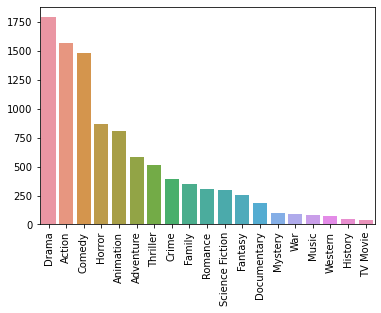

In [23]:
sns.barplot(x = df["Main_Genre"].value_counts().index,y = df["Main_Genre"].value_counts().values)
plt.xticks(rotation = 90)
plt.show()

## Drama is the most common films ,  After that Action and Comedy come

### 2 / the Genre of high rated movie : 

In [13]:
df["Vote_Average"].describe()

count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64

* "Vote_Average" values are correct and has no outliers

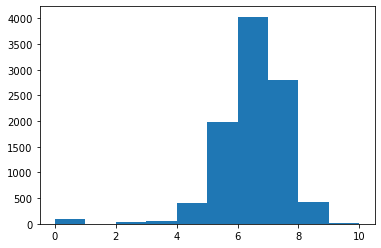

In [24]:
plt.hist(df["Vote_Average"],bins=10)
plt.show()

In [15]:
max_rate = df["Vote_Average"].max()
df.loc[df["Vote_Average"] == max_rate]["Genre"]

9391    Action, Drama
Name: Genre, dtype: object

##  Genre of high rated is "Action, Drama" 

### 3 / highest popularity movie  :

In [16]:
df["Popularity"].describe()

count    9827.000000
mean       40.326088
std       108.873998
min        13.354000
25%        16.128500
50%        21.199000
75%        35.191500
max      5083.954000
Name: Popularity, dtype: float64

C:\Users\mhmde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


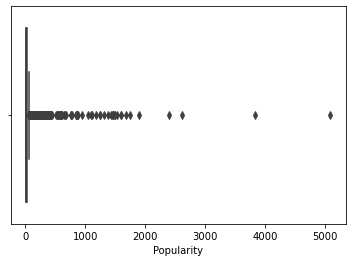

In [25]:
sns.boxplot(df["Popularity"])
plt.show()

* there are much outliers in "Popularity" ,but it's often normal  as there are films with high popularity all over the world 


In [18]:
max_pop = df["Popularity"].max()
df.loc[df["Popularity"] == max_pop , "Title"]

0    Spider-Man: No Way Home
Name: Title, dtype: object

## "Spider-Man: No Way Home" is the most popular movie

### 4 / the  year within released the largest number of movies :

In [19]:
df["Release_Date"].describe()

<ipython-input-19-7bf8e3da87eb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["Release_Date"].describe()


count                    9827
unique                   5893
top       2022-03-10 00:00:00
freq                       16
first     1902-04-17 00:00:00
last      2024-07-03 00:00:00
Name: Release_Date, dtype: object

In [22]:
wrong_date = df["Release_Date"] > dt.datetime.today()
df[wrong_date].head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Main_Genre
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.216,0,0.0,en,"Action, Crime",https://image.tmdb.org/t/p/original/2DyEk84Xnb...,Action
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.551,0,0.0,ja,"Animation, Science Fiction, Action",https://image.tmdb.org/t/p/original/wFYXVMKWLA...,Animation
232,2022-08-25,After Ever Happy,The fourth installment in The After Universe. ...,169.964,0,0.0,en,Romance,https://image.tmdb.org/t/p/original/vWLyXOFm1C...,Romance
322,2022-05-04,Doctor Strange in the Multiverse of Madness,"Doctor Strange, with the help of mystical alli...",144.134,0,0.0,en,"Fantasy, Action, Adventure",https://image.tmdb.org/t/p/original/wRnbWt44nK...,Fantasy
402,2022-06-08,Jurassic World Dominion,"Four years after Isla Nublar was destroyed, di...",122.236,0,0.0,en,"Adventure, Action, Science Fiction, Thriller",https://image.tmdb.org/t/p/original/blO6k1NsYg...,Adventure


* these films will be showed in the next few years and has no rate ,so it's normal to be obtained in df

In [21]:
year_release = df.groupby(df["Release_Date"].dt.year)["Release_Date"].count().sort_values(ascending = False)
year_release

Release_Date
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
2024      1
1925      1
1929      1
1930      1
1902      1
Name: Release_Date, Length: 102, dtype: int64

## 2021 is the year within released largest number of movies

# conclusion 

### * Drama is the most common films, After that Action and Comedy come
### * Genre of high rated is "Action, Drama"
### * "Spider-Man: No Way Home" is the most popular movie
### * 2021 is the year within released largest number of movies